\newpage

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from ucimlrepo import fetch_ucirepo 

heart_disease = fetch_ucirepo(id=45) 
  

1. Define and describe a classification problem using the dataset.

This dataset is intended to predict the severity of heart disease in individuals based on various medical attributes. The target variable `num` is a multiclass classification that indicates the severity of the disease, ranging from 0 to 4. The dataset includes 13 features, including `age`, `sex`, `cp`, `trestbps `, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`. The classification model’s goal is to predict the severity of heart disease in new patients based on these features.

2. Apply any chosen data transformations, or explain why no transformations were necessary.

There is no need for data transformations in this dataset. All the catgorical features has been encoded and the numerical features are already in a suitable format for modeling. Missing values will be handeled in future steps.

3.Provide a detailed description of the dataset, including variables, summaries, number of
observations, data types, and distributions (include at least three statements).

In [11]:
X = heart_disease.data.features 
y = heart_disease.data.targets 

print("Number of observations:", X.shape[0])
print("Number of features:", X.shape[1]) 
print("Summary of features in dataset:", X.describe())
print("distribution of target variable:", y.value_counts())


Number of observations: 303
Number of features: 13
Summary of features in dataset:               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.60

This dataset is intended to predict the severity of heart disease in individuals based on various medical attributes. The target variable `num` is a multiclass classification that indicates the severity of the disease, ranging from 0 to 4. The dataset includes 13 features, including `age`, `sex`, `cp`, `trestbps `, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`. There are a total of 303 observations. 

4. Transform the response num into a binary outcome: 1 for heart disease and 0 for no heart
disease. So combine 1, 2, 3, and 4 into 1 and 0 for 0. For Questions 4-16, use the transformed
binary outcome.

In [13]:
y['num'] = y['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)
print(y['num'].value_counts())

num
0    164
1    139
Name: count, dtype: int64


C:\Users\zhang\AppData\Local\Temp\ipykernel_8488\1399546461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)


5. Analyze relationships between variables and discuss their implications for feature selection or
extraction (include at least two statements).

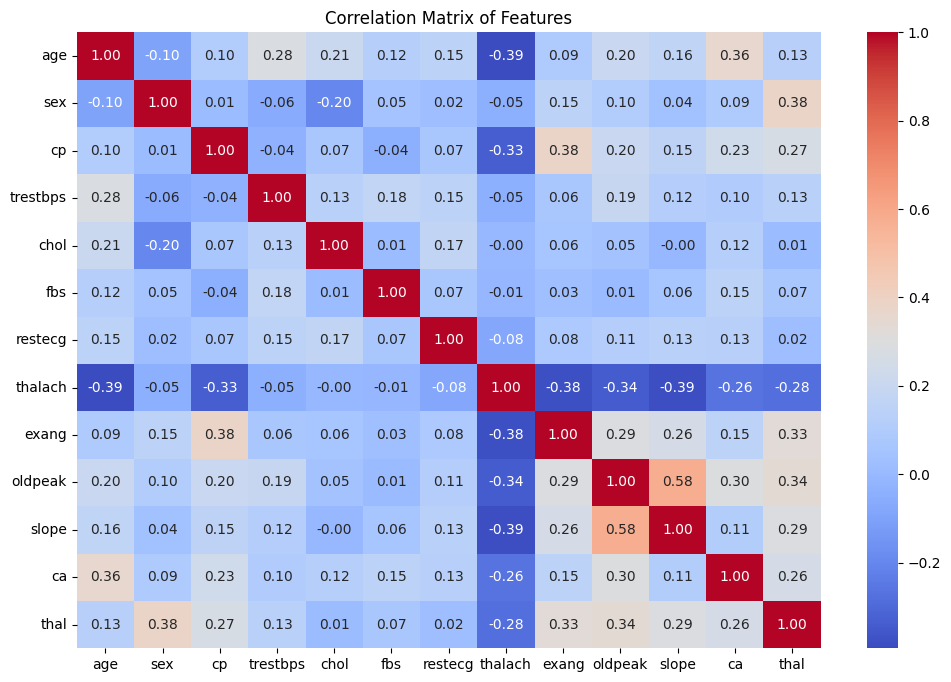

In [29]:

correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

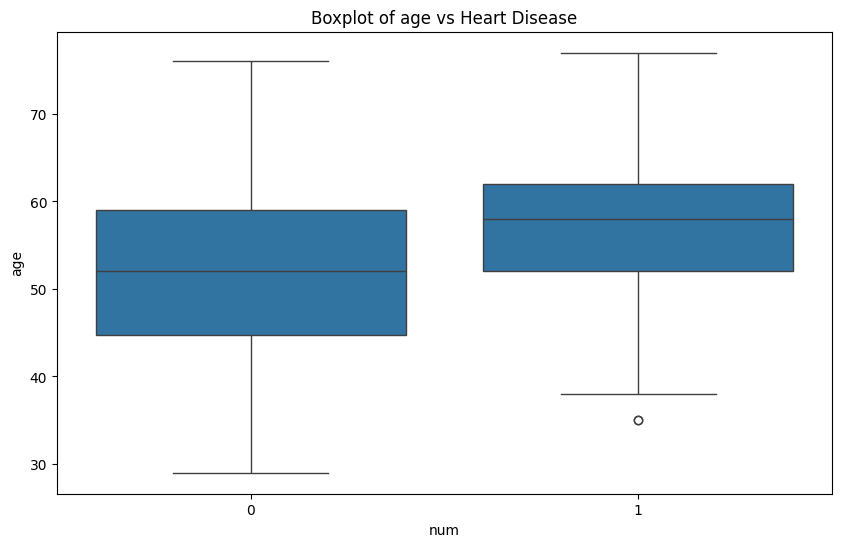

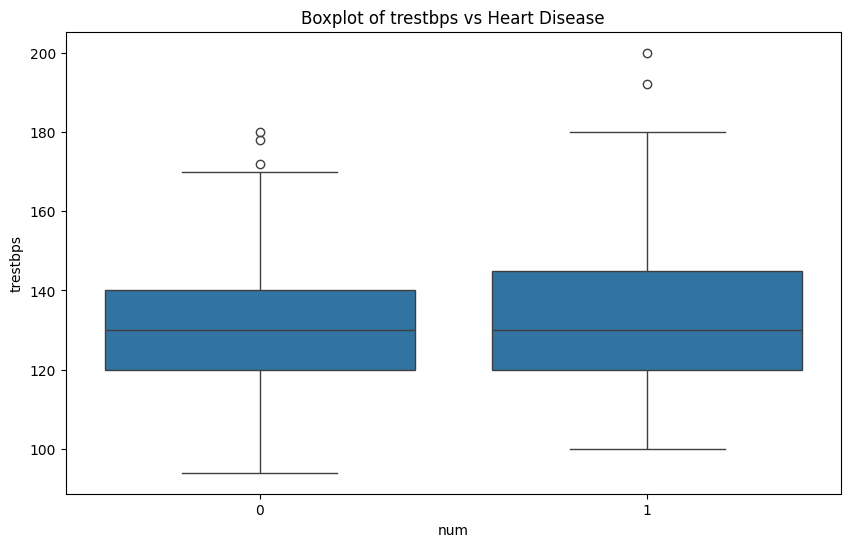

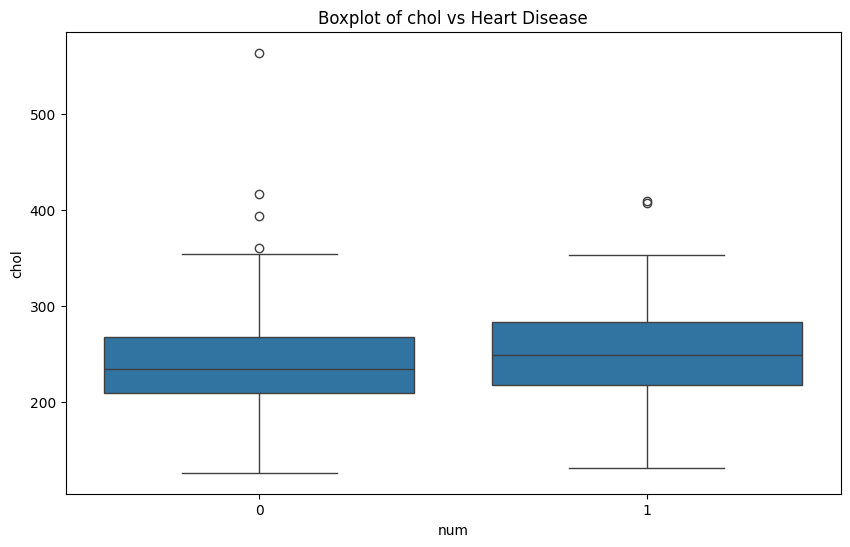

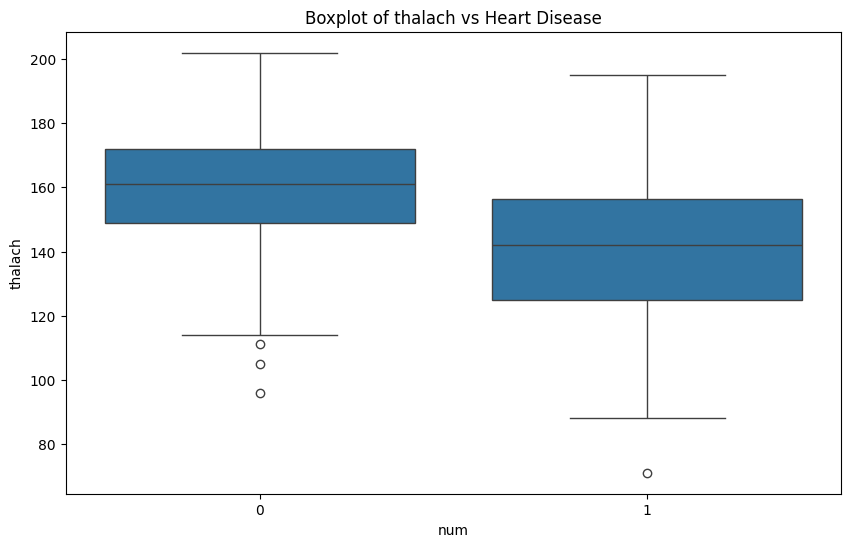

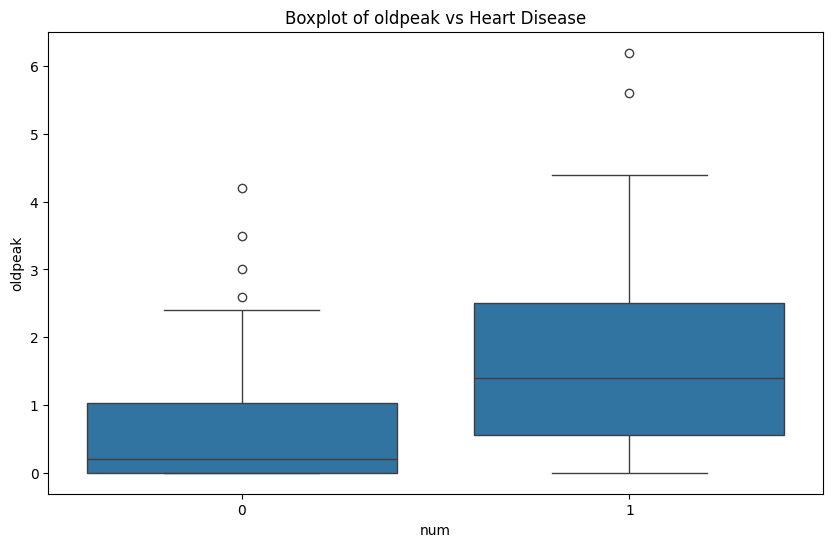

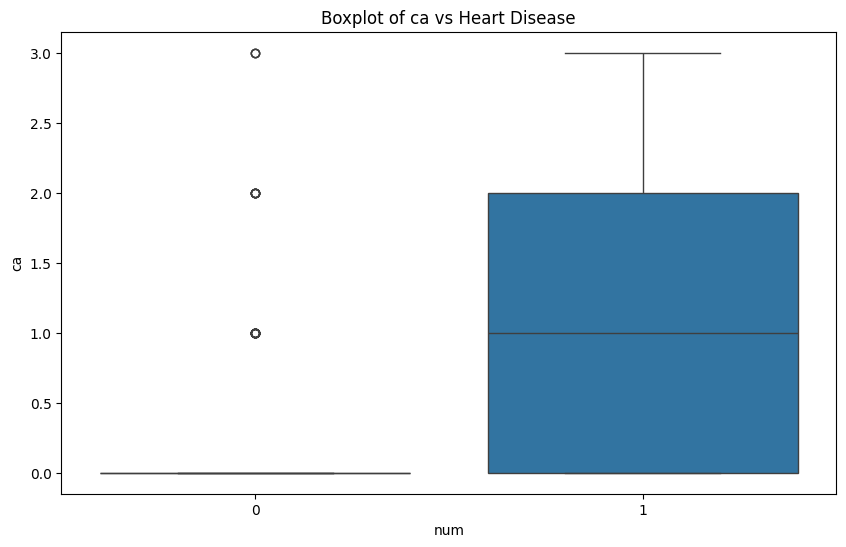

In [30]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak","ca"]
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y['num'], y=X[feature])
    plt.title(f"Boxplot of {feature} vs Heart Disease")
    plt.show()

Here above are some of the relationships between the numerical features and the target variable:some of them, e.g.`trestbps`, `chol`, does not appear to have a strong relationship with the target variable. While others, e.g. `age`, `thalach`, `oldpeak`, appear to have a strong relationship with the target variable. It is worth noting that the `ca` feature has very distiguished distribution between the two classes. This suggests that it may be a good candidate for feature selection or extraction.

6. Drop the rows with the missing values. How many osbervations after dropping the missing
values. Skip the outlier analysis.

In [32]:
X_cleaned = X.dropna()
print(X_cleaned.shape[0])

297


The number of obsercvations remaining in this dataset after removing the missing values is 297. 

7. Sub-group analysis: Explore potential sub-groups within the data using appropriate data
science methods. Identify and visualize these sub-groups without using the labels and cate-
gorical variables. Categroical variables already define sub groups so we don’t need to include them for this analysis.